# Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


**Search and find the code/solution and solve errors. Do not use any Copilot*



# MNIST Dataset
The MNIST dataset (Modified National Institute of Standards and Technology) is a widely used benchmark dataset for image classification tasks. It contains 70,000 grayscale images of handwritten digits (0–9), each of size 28×28 pixels — with 60,000 images for training and 10,000 for testing. Each image represents a single digit written by different people. The dataset is simple, clean, and ideal for training and evaluating machine learning or deep learning models, especially for tasks like digit recognition.

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Get MNIST dataset for training
MNIST = keras.datasets.mnist

In [5]:
# Load the dataset
(X_train, y_train), (X_test,y_test) = MNIST.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

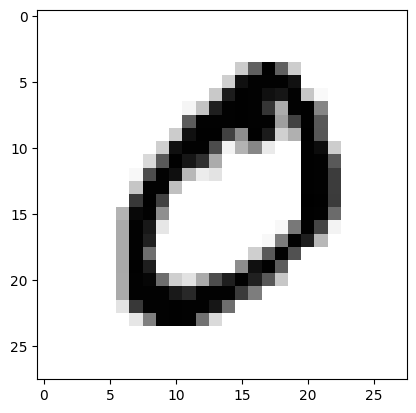

In [8]:
# To display one sample
plt.imshow(X_train[1], cmap = 'binary')
plt.show()

In [9]:
y_train[1]

np.uint8(0)

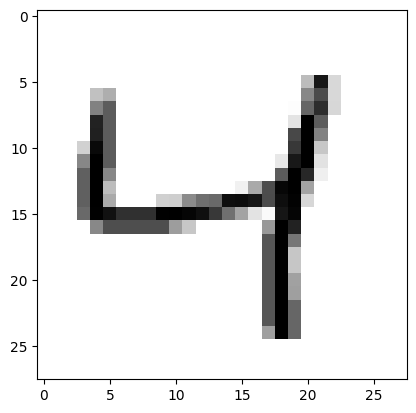

In [10]:
plt.imshow(X_train[2],cmap = 'binary')
plt.show()

In [11]:
y_train[3]

np.uint8(1)

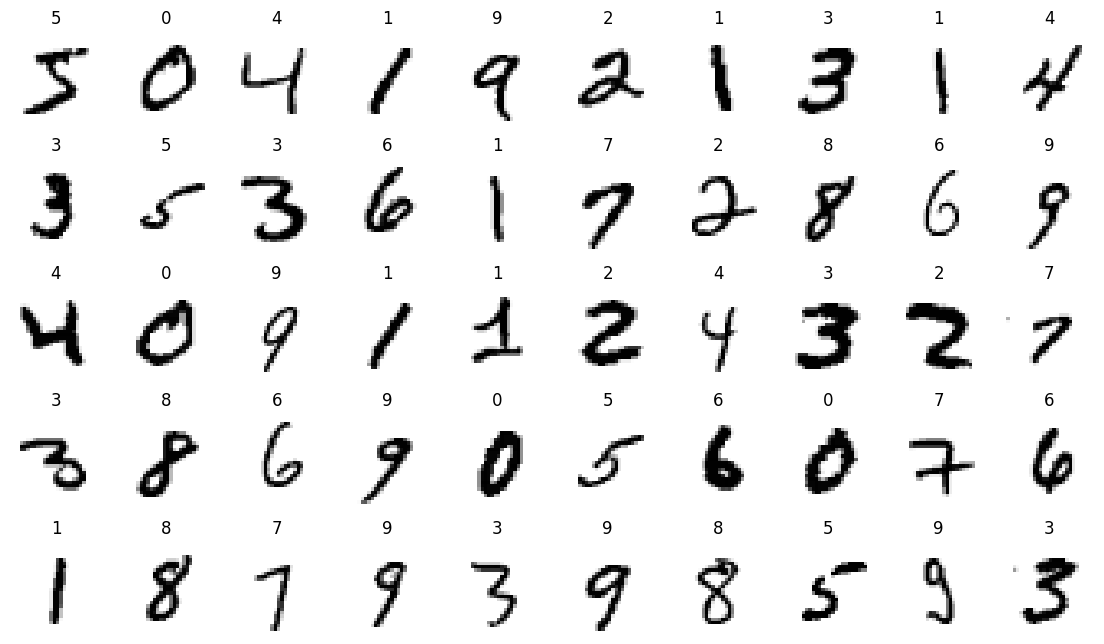

In [12]:
class_names = [0,1,2,3,4,5,6,7,8,9]
n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [13]:
DNN = keras.models.Sequential()     # initiate the model
DNN.add(keras.layers.Flatten(input_shape = [28,28]))   # define input layer
DNN.add(keras.layers.Dense(600, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(300, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(100, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(10, activation = 'softmax'))  # output layer
# Model summary
DNN.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [16]:
history_DNN = DNN.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8330 - loss: 3.4876 - val_accuracy: 0.9358 - val_loss: 0.2550
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9491 - loss: 0.1820 - val_accuracy: 0.9527 - val_loss: 0.1767
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9587 - loss: 0.1426 - val_accuracy: 0.9565 - val_loss: 0.1673
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9656 - loss: 0.1164 - val_accuracy: 0.9633 - val_loss: 0.1346
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9666 - loss: 0.1144 - val_accuracy: 0.9635 - val_loss: 0.1255
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9719 - loss: 0.0986 - val_accuracy: 0.9733 - val_loss: 0.1031
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9781 - loss: 0.0765 - val_accuracy: 0.9680 - val_loss: 0.1308
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9776 -

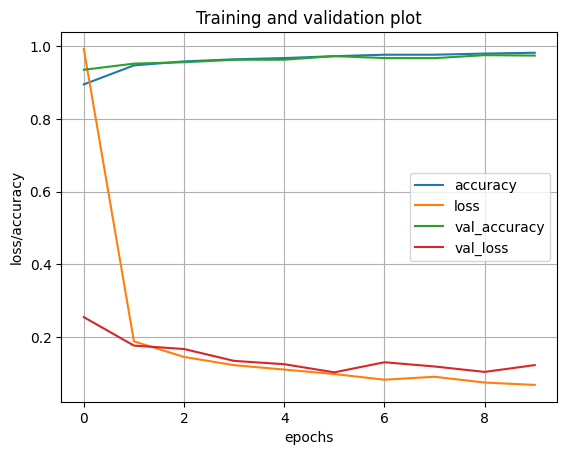

In [17]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [18]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9698 - loss: 0.1455
Test loss: 0.12907156348228455, Test accuracy: 0.9726999998092651


In [19]:
DNN2 = keras.models.Sequential()     # initiate the model
DNN2.add(keras.layers.Flatten(input_shape = [28,28]))   # define input layer
DNN2.add(keras.layers.Dense(600, activation = 'relu'))   # hidden layer
DNN2.add(keras.layers.Dense(512, activation = 'relu'))   # hidden layer
DNN2.add(keras.layers.Dense(128, activation = 'relu'))   # hidden layer
DNN2.add(keras.layers.Dense(32, activation = 'relu'))  # hidden layer
DNN2.add(keras.layers.Dense(10, activation = 'softmax'))  # Output layer

# Model summary
DNN2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       307,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 848,834 (3.24 MB)

 Trainable params: 848,834 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
DNN2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [22]:
history_DNN2 = DNN2.fit(X_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7637 - loss: 2.1642 - val_accuracy: 0.9400 - val_loss: 0.2510
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9410 - loss: 0.2367 - val_accuracy: 0.9540 - val_loss: 0.1673
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9564 - loss: 0.1604 - val_accuracy: 0.9657 - val_loss: 0.1313
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9656 - loss: 0.1289 - val_accuracy: 0.9678 - val_loss: 0.1412
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9689 - loss: 0.1090 - val_accuracy: 0.9672 - val_loss: 0.1351
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9756 - loss: 0.0902 - val_accuracy: 0.9697 - val_loss: 0.1298
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9784 - loss: 0.0823 - val_accuracy: 0.9773 - val_loss: 0.0888
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9822 -

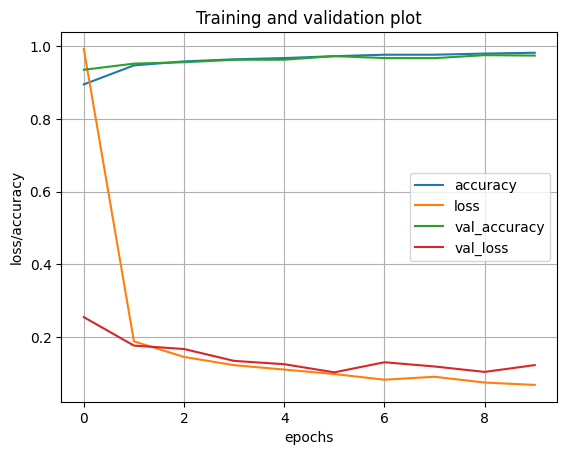

In [23]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [24]:
test_loss, test_accuracy = DNN.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9698 - loss: 0.1455
Test loss: 0.12907156348228455, Test accuracy: 0.9726999998092651


# Binary classifier using DNN


In [25]:
# Choose digits 3 and 8
class_3 = 3
class_8 = 8

# filtering the training data
X_train_filter = (y_train == class_3) | (y_train == class_8) # training set as 3 or 8
X_train_bin = X_train[X_train_filter]
y_train_bin = y_train[X_train_filter]

# filtering testing data
X_test_filter = (y_test == class_3) | (y_test == class_8)
X_test_bin = X_test[X_test_filter]
y_test_bin = y_test[X_test_filter]

# Relabel: make it binary (3 → 0, 8 → 1)
y_train_bin = (y_train_bin == 8).astype(int)
y_test_bin = (y_test_bin == 8).astype(int)

In [26]:
X_train_bin.shape

(11982, 28, 28)

In [27]:
y_train_bin.shape

(11982,)

In [28]:
y_test_bin.shape

(1984,)

In [29]:
X_test_bin.shape

(1984, 28, 28)

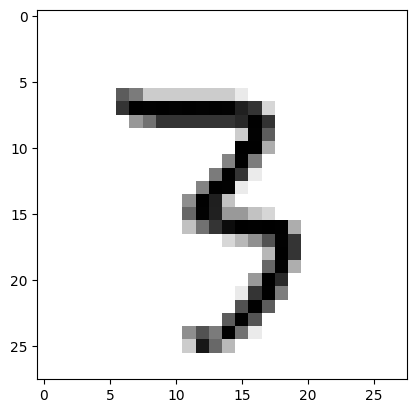

In [30]:
# display one image
plt.imshow(X_train_bin[8],cmap = 'binary')
plt.show()

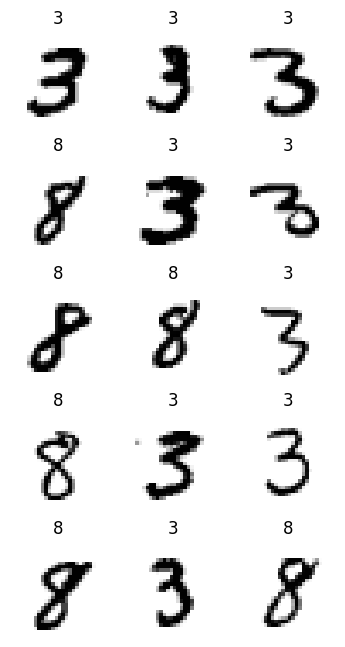

In [31]:
class_names = [3,8]
n_rows = 5
n_cols = 3
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_bin[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train_bin[index]])

In [32]:
model_bin = keras.models.Sequential()
model_bin.add(keras.layers.Flatten(input_shape = [28,28]))
model_bin.add(keras.layers.Dense(600, activation = 'relu'))
model_bin.add(keras.layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_bin.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,601 (1.80 MB)

 Trainable params: 471,601 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_bin.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [36]:
history_model_bin = model_bin.fit(X_train_bin, y_train_bin, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9200 - loss: 6.9943 - val_accuracy: 0.9808 - val_loss: 0.5999
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9809 - loss: 0.4369 - val_accuracy: 0.9825 - val_loss: 0.2991
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9901 - loss: 0.1877 - val_accuracy: 0.9867 - val_loss: 0.2562
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9920 - loss: 0.1409 - val_accuracy: 0.9825 - val_loss: 0.3154
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9930 - loss: 0.1308 - val_accuracy: 0.9925 - val_loss: 0.1780
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9954 - loss: 0.0567 - val_accuracy: 0.9825 - val_loss: 0.5226
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9935 - loss: 0.0842 - val_accuracy: 0.9850 - val_loss: 0.5049
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9923 - loss: 0.1118 - val_accuracy

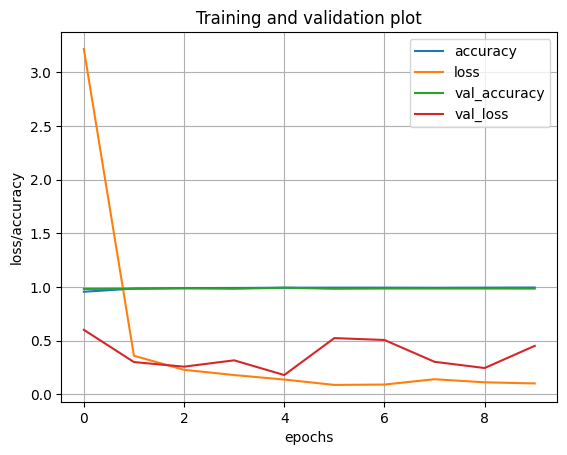

In [37]:
import pandas as pd
pd.DataFrame(history_model_bin.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [38]:
test_binary_loss, test_binary_accuracy = model_bin.evaluate(X_test_bin, y_test_bin)
print("Test loss: {}, Test accuracy: {}".format(test_binary_loss, test_binary_accuracy))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9881 - loss: 0.2321
Test loss: 0.1984715312719345, Test accuracy: 0.991431474685669


# NORMALIZATION



Normalization scales input values into a smaller range, usually [0, 1], to make model training faster and more stable.


In [43]:
X_train2 = X_train / 255.0
X_test2 = X_test / 255.0
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")
history_norm_DNN = DNN.fit(X_train2, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9952 - loss: 0.0168 - val_accuracy: 0.9818 - val_loss: 0.0845
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9837 - val_loss: 0.0756
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9828 - val_loss: 0.0854
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9830 - val_loss: 0.0717
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9832 - val_loss: 0.0953
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9818 - val_loss: 0.0938
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.9840 - val_loss: 0.0864
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9981 -

In [44]:
test_loss, test_accuracy = DNN.evaluate(X_test2, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9781 - loss: 0.1449
Test loss: 0.12395273149013519, Test accuracy: 0.9807999730110168
